<a href="https://colab.research.google.com/github/ngabo-dev/sentiment-analysis_group3/blob/main/Model_Comparison_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Import required libraries libraries
import numpy as np
import tensorflow as tf
from scipy import sparse
import pickle
import json
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

In [73]:

#  Defined paths for the saved models and processed data directories
SAVED_MODELS_DIR = '/content/drive/MyDrive/sentiment_analysis_models'
PROCESSED_DATA_DIR = '/content/processed_data'

#  Load test data and labels
print(f'Loading data from: {PROCESSED_DATA_DIR}')
X_test_tfidf = sparse.load_npz(os.path.join(PROCESSED_DATA_DIR, 'X_test_tfidf.npz'))
X_test_seq = np.load(os.path.join(PROCESSED_DATA_DIR, 'X_test_seq.npy'))
y_test = np.load(os.path.join(PROCESSED_DATA_DIR, 'y_test.npy'))
print('Test data and labels loaded.')

#  Load all models from Google Drive
print(f'\nLoading models from: {SAVED_MODELS_DIR}')
loaded_models = {}


Loading data from: /content/processed_data
Test data and labels loaded.

Loading models from: /content/drive/MyDrive/sentiment_analysis_models


## loading individual models

In [74]:
# Load RNN model
rnn_model_path = os.path.join(SAVED_MODELS_DIR, 'simple_rnn_sentiment_model.keras')
if os.path.exists(rnn_model_path):
    try:
        loaded_models['RNN'] = tf.keras.models.load_model(rnn_model_path)
        print("RNN model loaded successfully.")
    except Exception as e:
        print(f"Error loading RNN model: {e}")
else:
    print(f"Error: RNN model file not found at '{rnn_model_path}'")


# Load LSTM model
lstm_model_path = os.path.join(SAVED_MODELS_DIR, 'lstm_glove.keras')
if os.path.exists(lstm_model_path):
    try:
        loaded_models['LSTM'] = tf.keras.models.load_model(lstm_model_path)
        print("LSTM model loaded successfully.")
    except Exception as e:
        print(f"Error loading LSTM model: {e}")
else:
    print(f"Error: LSTM model file not found at '{lstm_model_path}'")


# Load SVM model
svm_model_path = os.path.join(SAVED_MODELS_DIR, 'svm.pkl')
if os.path.exists(svm_model_path):
    print(f"Attempting to load SVM model from: {svm_model_path}")
    try:
        loaded_models['SVM'] = joblib.load(svm_model_path)
        print("SVM model loaded successfully using joblib.")
    except Exception as e:
        print(f"Error loading SVM model with joblib: {e}")

else:
    print(f"Error: SVM model file not found at '{svm_model_path}'")


# Load Linear Regression model
lr_model_path = os.path.join(SAVED_MODELS_DIR, 'lr_model.pkl')
if os.path.exists(lr_model_path):
    try:
        with open(lr_model_path, 'rb') as f:
            loaded_models['Linear Regression'] = pickle.load(f)
        print("Linear Regression model loaded successfully.")
    except Exception as e:
        print(f"Error loading Linear Regression model: {e}")
else:
    print(f"Error: Linear Regression model file not found at '{lr_model_path}'")

RNN model loaded successfully.
LSTM model loaded successfully.
Attempting to load SVM model from: /content/drive/MyDrive/sentiment_analysis_models/svm.pkl
SVM model loaded successfully using joblib.
Error: Linear Regression model file not found at '/content/drive/MyDrive/sentiment_analysis_models/lr_model.pkl'


# Evaluating the models

In [75]:
# Define an evaluation function
def evaluate_and_report(model, test_features, test_labels, model_name):
    print(f"--- Evaluating {model_name} ---")
    if model is None:
        print(f"Skipping evaluation for {model_name} as it could not be loaded.")
        return None, None
    if isinstance(model, tf.keras.Model):
        y_pred_probs = model.predict(test_features)
        y_pred = (y_pred_probs > 0.5).astype(int)
    else:
        y_pred = model.predict(test_features)
    accuracy = accuracy_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred, average='binary')
    conf_matrix = confusion_matrix(test_labels, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(test_labels, y_pred))
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return accuracy, f1

a. Confusion Matrix

--- Evaluating RNN ---
446/446 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step
Accuracy: 0.9020
F1 Score: 0.9419

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      2209
           1       0.94      0.94      0.94     12032

    accuracy                           0.90     14241
   macro avg       0.81      0.82      0.81     14241
weighted avg       0.90      0.90      0.90     14241



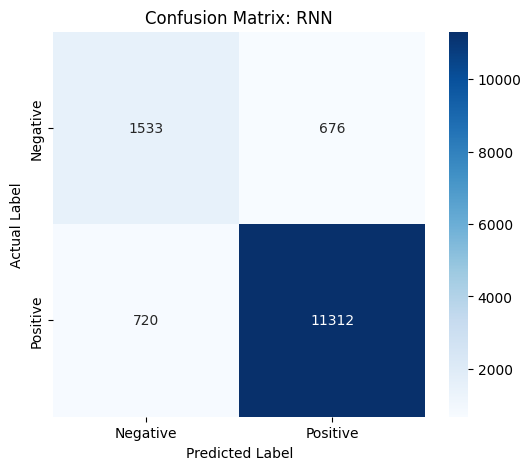

--- Evaluating LSTM ---
446/446 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step
Accuracy: 0.8448
F1 Score: 0.9149

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.07      0.12      2209
           1       0.85      0.99      0.91     12032

    accuracy                           0.84     14241
   macro avg       0.68      0.53      0.52     14241
weighted avg       0.80      0.84      0.79     14241



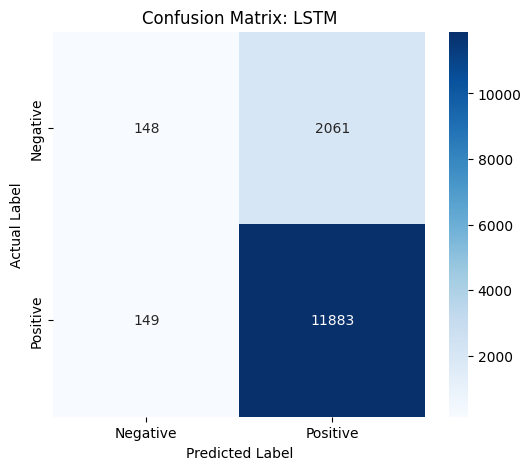

--- Evaluating SVM ---
Accuracy: 0.8082
F1 Score: 0.8918

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.11      0.16      2209
           1       0.85      0.94      0.89     12032

    accuracy                           0.81     14241
   macro avg       0.55      0.52      0.52     14241
weighted avg       0.76      0.81      0.78     14241



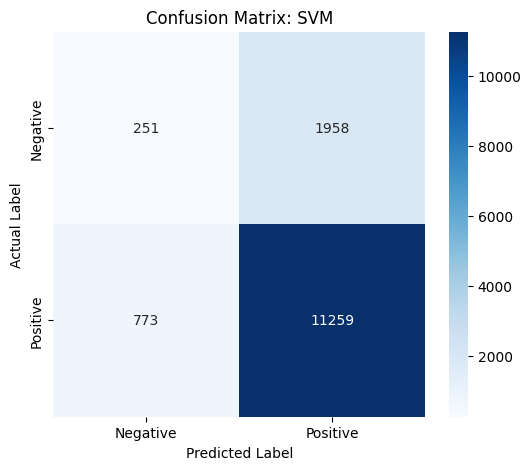

In [70]:
#  Evaluate models
results = {}
if loaded_models.get('RNN'):
    results['RNN'] = evaluate_and_report(loaded_models['RNN'], X_test_seq, y_test, "RNN")
if loaded_models.get('LSTM'):
    results['LSTM'] = evaluate_and_report(loaded_models['LSTM'], X_test_seq, y_test, "LSTM")
if loaded_models.get('SVM'):
    results['SVM'] = evaluate_and_report(loaded_models['SVM'], X_test_tfidf, y_test, "SVM")
if loaded_models.get('Linear Regression'):
    results['Linear Regression'] = evaluate_and_report(loaded_models['Linear Regression'], X_test_tfidf, y_test, "Linear Regression")

### b. Comparison chart in terms of **F1 score** and **Accuracy** metrics

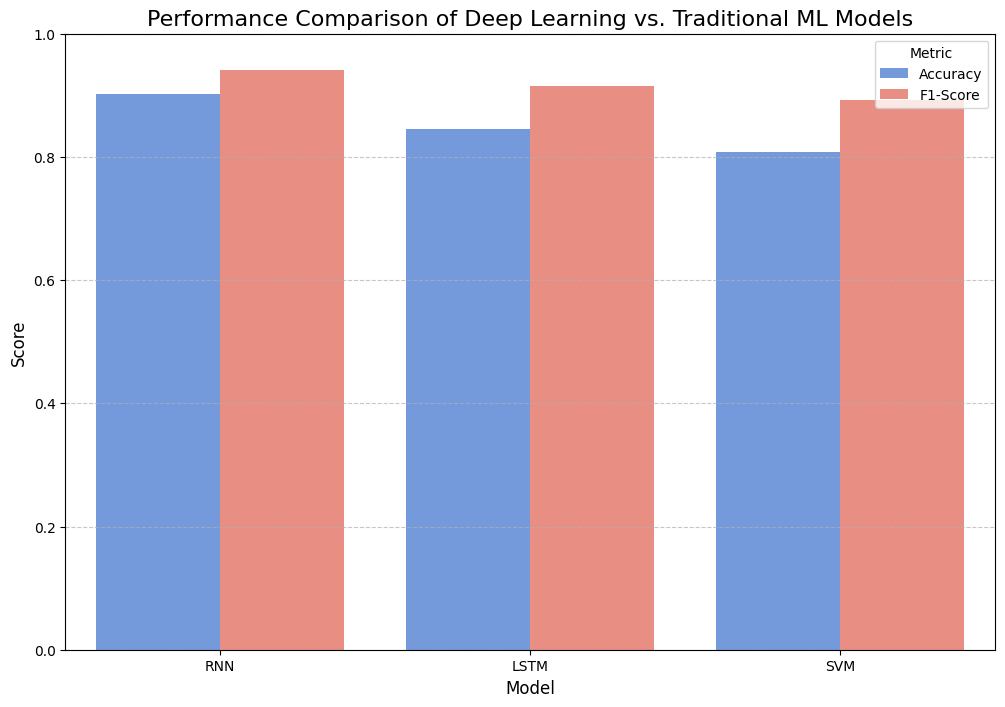

In [77]:
 # comparison chart for the 4 models
performance_data = {
    'Model': [name for name in results.keys() if results.get(name)],
    'Accuracy': [acc for acc, f1 in (results[name] for name in results.keys() if results.get(name))],
    'F1-Score': [f1 for acc, f1 in (results[name] for name in results.keys() if results.get(name))]
}
performance_df = pd.DataFrame(performance_data)
performance_df['Type'] = performance_df['Model'].apply(lambda x: 'Deep Learning' if x in ['RNN', 'LSTM'] else 'Traditional ML')
melted_df = performance_df.melt(id_vars=['Model', 'Type'], var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_df, palette=['cornflowerblue', 'salmon'])
plt.title('Performance Comparison of Deep Learning vs. Traditional ML Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1.0)
plt.legend(title='Metric', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()